<h1> Exploratory Data Analysis </h1>

<h2> Read Data In </h2>

In [1]:
import pyarrow.parquet as pq
import pyarrow as pa
import pandas as pd
import numpy as np
import altair as alt
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.plotly as py

This section simply reads the Parquet files stored on the disk to a DataFrame

In [2]:
filenamekillings = "/data/skariyadan/DaskKillings.parquet"
filenameincome = "/data/skariyadan/Income.parquet"
filenamebelowpoverty = "/data/skariyadan/BelowPoverty.parquet"
filenameeducation = "/data/skariyadan/Education.parquet"
filenameracestats = "/data/skariyadan/RaceStats.parquet"

The Killings DataFrame:

In [3]:
Killings = pq.read_table(filenamekillings).to_pandas()

In [4]:
Killings.head()

name       date    cause_of_death       armed   age gender  \
0          Tim Elliot 2015-01-02              shot         gun  53.0      M   
1    Lewis Lee Lembke 2015-01-02              shot         gun  47.0      M   
2  John Paul Quintero 2015-01-03  shot and Tasered     unarmed  23.0      M   
3     Matthew Hoffman 2015-01-04              shot  toy weapon  32.0      M   
4   Michael Rodriguez 2015-01-04              shot    nail gun  39.0      M   

       race           city state  mental_illness threat_level         flee  \
0     asian        shelton    WA            True       attack  not fleeing   
1     white          aloha    OR           False       attack  not fleeing   
2  hispanic        wichita    KS           False        other  not fleeing   
3     white  san francisco    CA            True       attack  not fleeing   
4  hispanic          evans    CO           False       attack  not fleeing   

   body_camera  
0        False  
1        False  
2        False  
3        False  
4        False

The Income DataFrame:

In [5]:
Income = pq.read_table(filenameincome).to_pandas()

In [6]:
Income.head()

state        city  median_income
0    AL      abanda          11207
1    AL   abbeville          25615
2    AL  adamsville          42575
3    AL     addison          37083
4    AL       akron          21667

The BelowPoverty DataFrame:

In [7]:
BelowPoverty = pq.read_table(filenamebelowpoverty).to_pandas()

In [8]:
BelowPoverty.head()

state        city  poverty_rate
0    AL      abanda     78.800003
1    AL   abbeville     29.100000
2    AL  adamsville     25.500000
3    AL     addison     30.700001
4    AL       akron     42.000000

The Education DataFrame:

In [9]:
Education = pq.read_table(filenameeducation).to_pandas()

In [10]:
Education.head()

state        city  completed_hs
0    AL      abanda     21.200001
1    AL   abbeville     69.099998
2    AL  adamsville     78.900002
3    AL     addison     81.400002
4    AL       akron     68.599998

The RaceStats DataFrame:

In [11]:
RaceStats = pq.read_table(filenameracestats).to_pandas()

In [12]:
RaceStats.head()

state        city      white      black  native_american  asian  hispanic
0    AL      abanda  67.199997  30.200001              0.0    0.0       1.6
1    AL   abbeville  54.400002  41.400002              0.1    1.0       3.1
2    AL  adamsville  52.299999  44.900002              0.5    0.3       2.3
3    AL     addison  99.099998   0.100000              0.0    0.1       0.4
4    AL       akron  13.200000  86.500000              0.0    0.0       0.3

<h2> Quick Overview of Fatal Shootings Over Time </h2>

First, let us examine fatal shootings over time, with respect to age, race, and state. This is to serve as a general overview of the Killings dataset, and what to expect with the data. The following is a Plotly interactive graph. Click on the image below to continue. The Plotly interactive graph allows for the user to view (over time) the age of each victim subsetted by race, and hovering over each point allows for the user to see the state where the victim was killed. Specific sections of the data can be selected to view a smaller section of data.

<div>
    <a href="https://plot.ly/~skariyadan/7/?share_key=p2j1XKheoGMRyrNEL64MKv" target="_blank" title="Plot 7" style="display: block; text-align: center;"><img src="https://plot.ly/~skariyadan/7.png?share_key=p2j1XKheoGMRyrNEL64MKv" alt="Plot 7" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="skariyadan:7" sharekey-plotly="p2j1XKheoGMRyrNEL64MKv" src="https://plot.ly/embed.js" async></script>
</div>


In addition, this is an Altair visualization similar to the above graph for quick reference. 

In [13]:
alt.Chart(Killings).mark_circle().encode(
x = alt.X("date:T",axis =alt.Axis(title = 'Date')),
y = alt.Y("age:Q", axis = alt.Axis(title = 'Age of Victims')),
color = alt.Color("race")
).properties(
    title='Age over Time',
    width=700,
    height=400
)

<VegaLite 2 object>

We can see that police shootings were distributed fairly consistently over time. Time does not seem to play a role, and no particular year or month resulted in more fatal police shootings. However, ages seems distributed with a greater density at younger ages. Given the large amount of data, nothing definitive can be currently stated regarding how age and race play into police violence. We will be looking into each aspect more specifically later on.

<h2> Fatal Police Shootings By Age </h2>

Now, let us examine police shootings by age. We will be using an Altair visualization to view a histogram of victim's ages. A color variable will also allow for further breakdown of age by race.

In [14]:
alt.Chart(Killings).mark_bar().encode(
x = alt.X("age",axis =alt.Axis(title = 'Age')),
y = alt.Y("count(*):Q",axis =alt.Axis(title = 'Number of Victims of Fatal Shootings')),
color = alt.Color("race")
).properties(
    title='Fatal Shootings By Age',
    width=700,
    height=400
)

<VegaLite 2 object>

Upon visual analysis, we can see how the Black and Hispanic histograms appear to be slightly more righy skewed than the other graphs, let us delve into some statistics regarding that.

The overall mean of age of victims of fatal police shootings:

In [15]:
Killings.age.mean()

36.304083648021816

The mean of victim's ages by race:

In [16]:
Killings.groupby("race")["age"].mean()

race
asian             36.605266
black             31.707845
hispanic          33.080505
nativeamerican    30.451613
other             33.071429
white             40.021189
Name: age, dtype: float64

As you can see, the median age of all victims is roughly 36.3, however examining the average age of victims by race, we can see that the mean age of Native American and Black victims are 30.5 and 31.7 respectively, whereas the median age of White victims is 40.0. That is almost a 10 year age difference, indicating that younger Black, Native, and Hispanic individuals are being killed more frequently than White ones.

<h2> Fatal Police Shootings By Gender </h2>

Now, let us examine police shootings by gender.Simply based on what we see in the news, we have an intuitive knowledge that majority of victims of police shootings are male. Let us examine that further using an Altair visualization. The following is a bar plot divided by gender, and through the color variable, race is factored in as well.

In [17]:
alt.Chart(Killings).mark_bar().encode(
y = alt.Y("gender",axis =alt.Axis(title = 'Sex')),
x = alt.X("count(*):Q",axis =alt.Axis(title = 'Number of Victims of Fatal Shootings')),
color = alt.Color("race")
).properties(
    title='Fatal Shootings By Sex',
    width=700,
    height=400
)

<VegaLite 2 object>

As expected, the majority of victims of police shootings are male, and the Black and White men are the ones primarily targetted.

<h2> Fatal Police Shootings By State </h2>

Now let us examine police shootings over state lines. Using an Altair visualization, we will have a boxplot visualization of the number of fatal police shootings by state. Using the color variable, we will further breakdown the data by race.

In [18]:
alt.Chart(Killings).mark_bar().encode(
x = alt.X("state",axis =alt.Axis(title = 'State')),
y = alt.Y("count(*):Q",axis =alt.Axis(title = 'Number of Victims of Fatal Shootings')),
color = alt.Color("race")
).properties(
    title="Fatal Shootings By State"
)

<VegaLite 2 object>

As we can see, the states that stand out here are California, Texas, followed by Florida and Arizona. Each of these states have very high rates of fatal police shootings, in addition to the fact that there are either more or roughly the same amount of PoC victims to White victims. Let us further explore why that may be.

Let us look at the race statistics of each of those states specifically, as well as states including Illinois and Louisiana. 

In [19]:
racestatstemp = RaceStats.groupby("state")[["state","white","black","asian","hispanic","native_american"]].mean()
racestatstemp["state"] = racestatstemp.index
racestatstemp.loc[racestatstemp.state.isin(["CA","TX","FL","AZ","IL","LA"])]

white      black     asian   hispanic  native_american state
state                                                                  
AZ     59.929047   0.954545  0.726608  20.144567        28.589800    AZ
CA     71.866295   2.692019  5.568206  29.649868         1.723087    CA
FL     78.672501  13.370870  1.616739  16.529131         0.455435    FL
IL     90.357056   4.704316  1.337454   5.170519         0.261814    IL
LA     64.814590  30.775476  0.786469   2.976533         0.957294    LA
TX     82.591934   5.879748  1.014760  39.364876         0.658867    TX

We can see how all of these states have higher percentages of people of color compared to other states.

The average percent makeup of Black people per city nationwide:

In [20]:
RaceStats.groupby("state")["black"].mean().mean()

7.830592

The average percent makeup of Asian people per city nationwide:

In [21]:
RaceStats.groupby("state")["asian"].mean().mean()

1.8423085

The average percent makeup of Hispanic people per city nationwide:

In [22]:
RaceStats.groupby("state")["hispanic"].mean().mean()

7.7475266

The average percent makeup of Native American people per city nationwide:

In [23]:
RaceStats.groupby("state")["native_american"].mean().mean()

3.6093

Compared to the national averages, each of these states have higher percentages of people of color, in addition to having a high population. States with above average percent makeup of people of color have a greater number of fatal police shootings involving people of color (primarily Black and Hispanic people). Note that the people of color are still considered minorities in each of these statistics, yet they still make up a significant portion of those who are killed.

<h2> Was The Victim Mentally Ill? </h2>

Mental illness and mental health play a major role in how one both interacts and is perceived by the police. Using an Altair visualization, we will now examine a boxplot of victims of fatal police shootings divided by whther they showed signs of being mentally ill or not. The color variable will allow for further breakdown of the data by whether or not they posed a threat.

In [24]:
alt.Chart(Killings).mark_bar().encode(
x = alt.X("mental_illness",axis =alt.Axis(title = 'Mental Illness')),
y = alt.Y("count(*):Q",axis =alt.Axis(title = 'Number of Victims of Fatal Shootings')),
color = alt.Color("threat_level")
).properties(
    title='Fatal Shootings By Signs of Mental Illness',
    width=700,
    height=400
)

<VegaLite 2 object>

Majority of the victims actually appeared to be mentally healthy. Let us further explore how likely a mentally ill, or healthy person is likely to attack.

In [25]:
Killings.groupby(["mental_illness","threat_level"])["mental_illness"].count()

mental_illness  threat_level
False           attack          1148
                other            488
                undetermined     117
True            attack           355
                other            219
                undetermined      13
Name: mental_illness, dtype: int64

In [26]:
print("Mentally Healthy Likelihood of Actively Attacking Based on Data "+str(1148/(1148+488+117)))
print("Mentally Unealthy Likelihood of Actively Attacking Based on Data "+str(355/(255+219+13)))

Mentally Healthy Likelihood of Actively Attacking Based on Data 0.6548773531089561
Mentally Unealthy Likelihood of Actively Attacking Based on Data 0.728952772073922


Mentally ill people (based on the data) are slightly more likely to be actively attacking. However, what kind of weapons are the mentally ill using? The weapon in use affects the seriousness of the threat.

In [27]:
Killings.groupby(["mental_illness","threat_level","armed"])["armed"].count()

mental_illness  threat_level  armed             
False           attack        blunt metal object      3
                              blunt object            9
                              chain                   1
                              contractor's level      1
                              crossbow                2
                              flashlight              1
                              gun                   869
                              hatchet                 1
                              knife                  87
                              nail gun                1
                              pen                     1
                              screwdriver             3
                              shovel                  1
                              taser                   5
                              toy weapon             39
                              unarmed                43
                              unknown                20

By examining the above data, we can see that <i>none</i> of the mentally ill people were armed with a gun. In fact, most frequently used weapon held by the mentally ill people classified as attacking was actually a toy gun. The rest of the weapons were largely small scale, or were even unarmed. Therefore, although mentally ill appear to have been reported to attack more frequently out of the victims, they were armed less heavily.

<h2> Was the Victim Dangerous? </h2>

Often times, the first question people have regarding a police shooting is whether the person in question was posing an immediate threat. The following Altair visualization will compare whether the victim was armed, whether the victim was fleeing, and the threat level of the victim, all three criterion for determining whether a victim was dangerous.

In [28]:
alt.Chart(Killings).mark_bar().encode(
x = alt.X("armed",axis =alt.Axis(title = 'Weapon')),
y = alt.Y("flee",axis =alt.Axis(title = 'Fleeing')),
color = alt.Color("threat_level")
).properties(
    title='Was the Victim Armed, Fleeing, or Threatening?',
    width=900,
    height=200
)

<VegaLite 2 object>

Many of the victims did not appear to be fleeing. Let us examine how the victims fall into each of these categories further.

In [29]:
Killings.groupby(["threat_level"])["threat_level"].count()

threat_level
attack          1503
other            707
undetermined     130
Name: threat_level, dtype: int64

In [30]:
print("Percentage of victims that were attacking "+str(1503/(1503+707+130)))

Percentage of victims that were attacking 0.6423076923076924


In [31]:
Killings.groupby(["flee"])["flee"].count()

flee
car             365
foot            279
not fleeing    1555
other            89
unknown          52
Name: flee, dtype: int64

In [32]:
print("Percentage of victims that were fleeing "+str(1555/(1555+365+279+89+52)))

Percentage of victims that were fleeing 0.6645299145299145


In [33]:
Killings.groupby(["threat_level","flee"])["flee"].count()

threat_level  flee       
attack        car             221
              foot            181
              not fleeing    1019
              other            59
              unknown          23
other         car             121
              foot             78
              not fleeing     469
              other            22
              unknown          17
undetermined  car              23
              foot             20
              not fleeing      67
              other             8
              unknown          12
Name: flee, dtype: int64

In [34]:
print("Percentage of victims that were fleeing and actively attacking "+str((221+181+59)/(221+181+1019+59+121+78+469+22+23+20+67+8+12)))

Percentage of victims that were fleeing and actively attacking 0.20043478260869566


<iframe width="900" height="800" frameborder="0" scrolling="no" src="//plot.ly/~skariyadan/1.embed"></iframe>

<h2> Fatal Police Shootings Across Income Lines </h2>

We will now examine how a city's median income level affects the rate of fatal police shootings. 

In [35]:
income = Killings[["state","city"]]
tempincome = np.array([])
for index,row in income.iterrows():
    tempstate = row["state"]
    tempcity = row["city"]
    temprows = Income.loc[Income["state"]==tempstate]
    check = 0
    for i,r in temprows.iterrows():
        citycheck = r["city"]
        if(tempcity in citycheck):
            tempincome = np.append(tempincome,r.median_income)
            check = 1
        if(check == 1):
            break
    if(check == 0):
        tempincome = np.append(tempincome,np.nan)
income["median_income"] = tempincome

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
income.head()

state           city  median_income
0    WA        shelton        37072.0
1    OR          aloha        65765.0
2    KS        wichita        45947.0
3    CA  san francisco        81294.0
4    CO          evans        47791.0

In [37]:
alt.Chart(income).mark_bar().encode(
x = alt.X("median_income",axis =alt.Axis(title = "Median Income Level of Victim's City")),
y = alt.Y("count(*):Q", axis = alt.Axis(title = 'Number of Victims of Fatal Shootings'))
).properties(
    title="Histogram of the Median Income of Victim's Location",
    width=700,
    height=400
)

<VegaLite 2 object>

This chart exemplifies a definitely right-skewed histogram, meaning that individuals from lower income areas are primarily the ones being killed in fatal police shootings. For comparison, let us examine how income is distributed nationally.

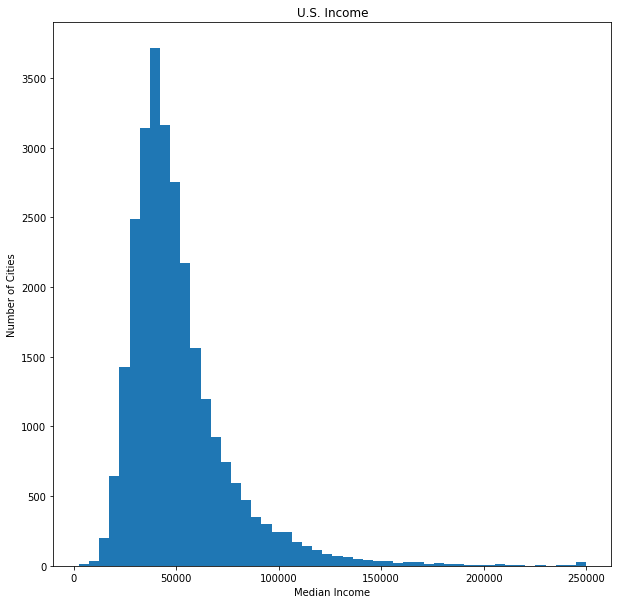

In [38]:
plt.figure(figsize=(10,10))
plt.hist(Income.median_income,bins = 50)
plt.xlabel("Median Income")
plt.ylabel("Number of Cities")
plt.title("U.S. Income")
plt.show()

We can see that the income distribution nationwide is right-skewed as well. Let us examine the mean of each sets of incomes.

In [39]:
Income.median_income.mean()

51335.94809978846

In [40]:
income.median_income.mean()

49640.3900742115

The means of the incomes are roughly similar, however the mean of the incomes for those killed in police shootings is lower than the national average by 2768.00109. This indicates that the victims of fatal police shootings came from generally poorer areas than the national average. 

Now let us see the correlation between race and income.

In [41]:
averageincomestatewide = income.groupby("state")["median_income"].mean()
incidentcount = income.groupby("state")["state"].count()
incomevscount = pd.DataFrame({"statecount":incidentcount,"income":averageincomestatewide})
incomevscount["state"] = incomevscount.index

In [42]:
racemakeup = RaceStats.groupby("state")[["white","black","asian","native_american","hispanic"]].mean()
racemakeup["state"] = racemakeup.index
racemajority = np.array([])
for index,row in racemakeup.iterrows():
    w = row["white"]
    b = row["black"]
    a = row["asian"]
    n = row["native_american"]
    h = row["hispanic"]
    if(w==max(w,b,a,n,h)):
        racemajority = np.append(racemajority,"White")
    elif(b==max(w,b,a,n,h)):
        racemajority = np.append(racemajority,"Black")
    elif(a==max(w,b,a,n,h)):
        racemajority = np.append(racemajority,"Asian")
    elif(n==max(w,b,a,n,h)):
        racemajority = np.append(racemajority,"Native American")
    elif(h==max(w,b,a,n,h)):
        racemajority = np.append(racemajority,"Hispanic")
    else:
        racemajority = np.append(racemajority,None)
incomevscount["racemajority"]=racemajority

In [43]:
incomevscount.head()

income  statecount state     racemajority
state                                                 
AK     64775.333333          14    AK  Native American
AL     42549.897436          46    AL            White
AR     43035.863636          22    AR            White
AZ     52908.245283         107    AZ            White
CA     57472.483146         383    CA            White

In [44]:
alt.Chart(incomevscount).mark_circle().encode(
x = alt.X("statecount",axis =alt.Axis(title = "Total Number of Fatal Shootings In a State")),
y = alt.Y("income:Q", axis = alt.Axis(title = 'Mean Income of State')),
color = alt.Color("racemajority")

).properties(
    title="Statewide Median Income vs Number of Fatal Shootings",
    width=700,
    height=400
)

<VegaLite 2 object>

The above Altair visualization has the total number of fatal shootings in a state on the x-axis and the mean income of a state on the y-axis column. The chart is fairly clustered around a total number of shootings numbering between 20-100. There is also a slight trend toward greater shootings associated with lower income (save for the outlier which is California).

<h2>Fatal Police Shootings Across Education Levels </h2>

We will now examine how a city's median income level affects the rate of fatal police shootings.

In [45]:
tempedu = Killings[["state","city"]]
tempedu = pd.merge(tempedu,Education, on = ["state","city"],how="inner").dropna()

In [46]:
tempedu.head()

state     city  completed_hs
0    WA  shelton     80.099998
1    OR    aloha     88.099998
2    OR    aloha     88.099998
3    KS  wichita     87.500000
4    KS  wichita     87.500000

In [47]:
incidentcount = income.groupby("state")["state"].count()
temphs = tempedu.groupby("state")["completed_hs"].mean()

In [48]:
incidentcount.state = incidentcount.index
counts = incidentcount.loc[incidentcount.state != "DC"]
education = pd.concat([counts,temphs],axis = 1)

In [49]:
alt.Chart(education).mark_circle().encode(
x = alt.X("completed_hs",axis =alt.Axis(title = "Percent of People Above 25 Who Completed High School")),
y = alt.Y("state:Q", axis = alt.Axis(title = 'Number of Victims of Fatal Shootings'))
).properties(
    title="Number of Fatal Shootings vs Education",
    width=700,
    height=400
)

<VegaLite 2 object>

The above Altair graph charts the number of incidents per state on the x-axis and the total number of victims of fatal police shootings per state on the y-axis. There is a clear correlation between higher rates of education and lower number of police shootings.

<h2> Fatal Police Shootings Across Race Lines </h2>

We will now examine how race plays a factor in fatal police shootings.

In [50]:
alt.Chart(Killings).mark_bar().encode(
x = alt.X("race",axis =alt.Axis(title = 'Race')),
y = alt.Y("count(*):Q", axis = alt.Axis(title = 'Number of Victims of Fatal Shootings By Race')),
color = alt.Color("race")
).properties(
    title='Fatal Shootings Over Race Lines',
    width=700,
    height=400
)

<VegaLite 2 object>

As you can see, just purely by numbers White people are victims of the most police shootings, followed by Black people. Hispanic people are the third most frequent, with Asian/Native American/Other races comprising of a small number. 

This chart however, does not take into account comparing percentage of police shootings with respect to population density, however. We will be examining to see how races are affected with respect to population density.

In [51]:
wcount = len(Killings.loc[Killings.race == "white"])
bcount = len(Killings.loc[Killings.race == "black"])
acount = len(Killings.loc[Killings.race == "asian"])
hcount = len(Killings.loc[Killings.race == "hispanic"])
ncount = len(Killings.loc[Killings.race == "nativeamerican"])

In [52]:
wtotal = 232943055
btotal = 39908095
atotal = 16235305
htotal = 50477594
ntotal = 2569170

In [53]:
wprop = wcount/wtotal
bprop = bcount/btotal
aprop = acount/atotal
hprop = hcount/htotal
nprop = ncount/ntotal
proportions = np.array([aprop,wprop,hprop,bprop,nprop])
races = list(Killings.race.unique())
del races[races.index("other")]
prop = pd.DataFrame({"Races":races,"Prop":proportions})

In [54]:
alt.Chart(prop).mark_bar().encode(
x = alt.X("Races"),
y = alt.Y("Prop", axis = alt.Axis(title = 'Percentage of Total Racial Population Killed By Police')),
color = alt.Color("Races")
).properties(
    title='Fatal Shootings Over Race Lines With Respect To Proportion of Race',
    width=700,
    height=400
)

<VegaLite 2 object>

When overall proportion with respect to overall population is taken into account,the statistics tell a completely different story. Yes, purely by number more White people are killed by police in fatal shootings, however Black, Native American, and Hispanic people are <b><i>disproportionately</i></b> killed by police shootings. Despite making up a significantly fewer number of people, more minorities are being killed by police. 

In [55]:
bprop/wprop

3.003545650843296

Black people are 3.0035 more likely than White people to be killed by a police shooting.

In [56]:
nprop/wprop

2.3403219781691322

Native people are 2.3403 more likely than White people to be killed by a police shooting.

In [57]:
hprop/wprop

1.625355931983074

Hispanic people are 1.62535 more likely than White people to be killed by a police shooting.

In [58]:
wprop/aprop

2.1462933764032632

Conversely, White people are 2.1463 more likely than Asian people to be killed by a police shooting.

<b> What's Next? </b>

In the next notebook, 05-Modeling, we will apply statistical models and machine learning to the data to conduct predictive analysis.